In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pytorch_grad_cam import GradCAMPlusPlus, XGradCAM, EigenCAM, LayerCAM, HiResCAM, FullGrad, RandomCAM
# , AblationCAM
from CAM.ablation_cam import AblationCAM
from CAM.score_cam import ScoreCAM
from CAM.grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import scale_cam_image
from utils import *

In [2]:
model = models.vgg16(pretrained=True)
model.eval()
model = model.to('cuda')

/home/khmt/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/khmt/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import os

def get_file_paths(folder_path):
    files = os.listdir(folder_path)
    return files

# Đường dẫn đến thư mục chứa các tệp
folder_path = '../ILSVRC2012_val_folders'
file_paths = get_file_paths(folder_path)

In [4]:
image_path = f"../ILSVRC2012_val_folders/{file_paths[19]}"
image_tensor = input_link(image_path)
image_tensor = image_tensor.to('cuda')
yhat = model(image_tensor)
result = predict_decode(yhat)

('marmot', 0.9989489912986755)
('beaver', 0.0010299794375896454)
('wombat', 5.615929694613442e-06)
('mink', 5.035651611251524e-06)
('otter', 3.687015578179853e-06)


In [5]:
label = result[1]
target_layers = [model.features[-1]]
targets = [ClassifierOutputTarget(label)]
# Load the image
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (224, 224))
# Convert BGR to RGB (OpenCV loads images as BGR by default)
img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

In [6]:
model_CAM = ScoreCAM
cam = model_CAM(model=model, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_tensor, targets=None)
grayscale_cam = grayscale_cam[0, :]
grayscale_cam.shape

init basecan
__call__
tar : (224, 224)


 25%|██▌       | 1/4 [00:00<00:01,  2.71it/s]

[1.215496301651001, -1.0074353218078613, 2.9124011993408203, 0.6406165361404419, 0.63144451379776, 1.1654222011566162, -1.0074353218078613, 15.739995956420898, 2.513247489929199, 2.2016687393188477, -1.0074353218078613, 0.15215477347373962, 3.540679454803467, 6.739010810852051, -1.0074353218078613, 4.754134178161621, 1.931092381477356, -1.0074353218078613, -1.0074353218078613, 15.510061264038086, 9.561653137207031, 18.332603454589844, -0.6888120174407959, 14.175182342529297, 2.7566699981689453, 2.8980889320373535, 5.118807792663574, 0.9442072510719299, 0.24874238669872284, -1.0074353218078613, 2.146439790725708, -0.44248467683792114, 10.508472442626953, 13.637738227844238, -1.0074353218078613, 1.3563141822814941, 4.602414608001709, 6.0117998123168945, 0.8375136256217957, -1.03038489818573, -1.0074353218078613, 0.9519701600074768, 4.128167629241943, -1.0074353218078613, -1.0074353218078613, 3.663760185241699, 13.89482307434082, -1.0074353218078613, 16.632713317871094, -1.007435321807861

 50%|█████     | 2/4 [00:00<00:00,  2.78it/s]

[-1.0074353218078613, 2.2720651626586914, -1.0074353218078613, 13.176246643066406, 2.397364616394043, -0.37911054491996765, 16.787593841552734, 4.3145222663879395, -1.0074353218078613, 2.3127641677856445, 1.2318763732910156, 10.184379577636719, 4.450910568237305, -1.0074353218078613, 2.586442232131958, 4.369749546051025, -1.0074353218078613, 2.2933363914489746, -1.0074353218078613, 1.912149429321289, 1.6084785461425781, -0.5333304405212402, 3.1666855812072754, -1.0074353218078613, -1.0074353218078613, 3.0117549896240234, -1.0074353218078613, 0.29137516021728516, -1.0074353218078613, -1.0074353218078613, 1.5456867218017578, 3.784113883972168, 8.294544219970703, -1.0074353218078613, 4.791843891143799, -0.34104257822036743, -1.0074353218078613, 1.535632610321045, 18.401123046875, 3.0217971801757812, 3.105917453765869, 1.795344591140747, 3.0005714893341064, 1.4612534046173096, 3.8088793754577637, -1.0074353218078613, -1.0074353218078613, 16.71841049194336, -1.0074353218078613, 2.6159186363

 75%|███████▌  | 3/4 [00:01<00:00,  2.79it/s]

[-1.0074353218078613, 5.049473285675049, 9.775962829589844, -1.0074353218078613, 9.111705780029297, 3.3100900650024414, 1.869411587715149, 1.546651840209961, 2.2492334842681885, -1.0074353218078613, 2.1480326652526855, 2.9636077880859375, -0.20460495352745056, 0.9060779213905334, -1.0074353218078613, 2.774388551712036, 15.963188171386719, -1.0074353218078613, -1.0074353218078613, -1.0074353218078613, 0.804930567741394, 2.059713840484619, -1.0074353218078613, 2.656973361968994, -0.3710550367832184, -1.0074353218078613, 15.636398315429688, -0.19838759303092957, 1.7200226783752441, 1.9121856689453125, -1.0074353218078613, 2.673154830932617, -1.0074353218078613, -1.0074353218078613, -1.0074353218078613, 2.8707480430603027, -1.0074353218078613, -1.0074353218078613, 3.3538970947265625, 7.106223106384277, -1.0074353218078613, 2.523017406463623, 5.257136344909668, -1.0074353218078613, 5.573554515838623, 3.580108642578125, 1.5971949100494385, 1.5617626905441284, -1.0074353218078613, 7.582851409

100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

[-1.0074353218078613, 14.32258415222168, -0.783402681350708, 19.137237548828125, 0.21519428491592407, -1.0074353218078613, -1.0074353218078613, 4.7683210372924805, -1.2635784149169922, -1.0074353218078613, 0.76251220703125, 2.3191404342651367, 2.6224632263183594, 2.722784996032715, -1.0074353218078613, 4.016129970550537, -1.0074353218078613, 2.566408634185791, 1.9635933637619019, 1.9011749029159546, -1.0074353218078613, -1.0074353218078613, -1.0074353218078613, -1.0074353218078613, -1.0074353218078613, 1.5528652667999268, -0.7967448234558105, -1.0074353218078613, 0.09189370274543762, 1.4172765016555786, 3.1210198402404785, 14.304616928100586, 2.3084137439727783, 15.21990966796875, -1.0074353218078613, -1.3972289562225342, -1.0074353218078613, -1.0074353218078613, -1.0074353218078613, 2.0160293579101562, 1.444643497467041, -1.0074353218078613, -1.0074353218078613, 4.629189491271973, 3.1848411560058594, 3.7181003093719482, -1.0074353218078613, -0.34584182500839233, 3.43104887008667, 3.63

(224, 224)

In [7]:
cam.get_activations_and_grads()
outputs = cam.activations_and_grads(image_tensor)

In [8]:
outputs.shape

torch.Size([1, 1000])

In [9]:
activations_list = cam.get_activations_list()
grads_list = cam.get_grads_list()

In [10]:
grads_list

[]

In [11]:
activations_scale = scale_cam_image(activations_list[0][0], (224,224))
# grads_scale = scale_cam_image(grads_list[0][0], (224,224))
activations_scale.shape

(512, 224, 224)

In [12]:
# argmax_indices = np.argmax(grads_scale, axis=0)
# plt.imshow(argmax_indices, cmap='viridis')  # Displaying the array as an image
# plt.colorbar()  # Adding a color bar for reference
# plt.show()

In [13]:
# l = list(set(argmax_indices.flatten().tolist()))

In [14]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# visualization = show_cam_on_image(img, np.argmax(grads_scale, axis=0), use_rgb=True)
# # visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
# axs[0].imshow(np.argmax(grads_scale, axis=0))
# axs[0].axis('off')  # Hide axes
# axs[1].imshow(img)
# # axs[k, 1].set_title(f"grads_visualization", fontsize=10)
# axs[1].axis('off')  # Hide axes
# axs[2].imshow(visualization)
# # axs[k, 1].set_title(f"grads_visualization", fontsize=10)
# axs[2].axis('off')  # Hide axes

In [15]:
arr = cam.get_weights()[0]

l = np.argpartition(arr, -10)[-10:]
print(l)

[121  21 166  86 362 387 222 109 356 191]


(-0.5, 223.5, 223.5, -0.5)

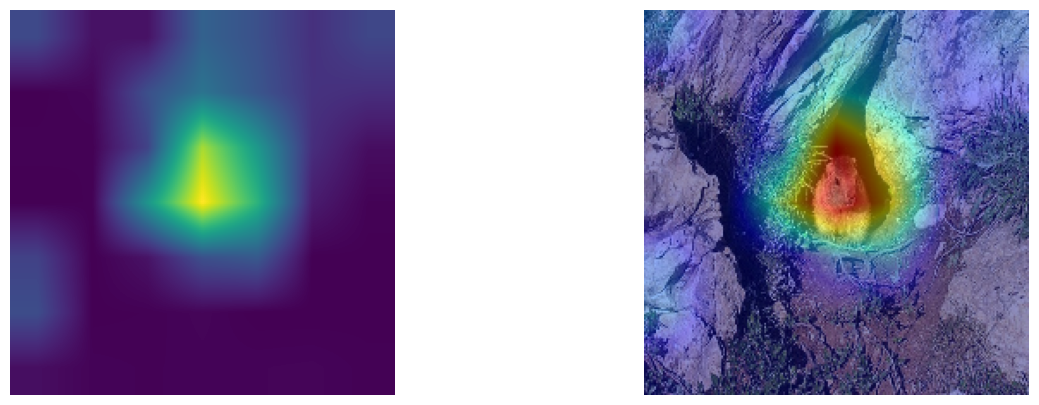

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
axs[0].imshow(grayscale_cam)
axs[0].axis('off')  # Hide axes
axs[1].imshow(visualization)
# axs[k, 1].set_title(f"grads_visualization", fontsize=10)
axs[1].axis('off')  # Hide axes

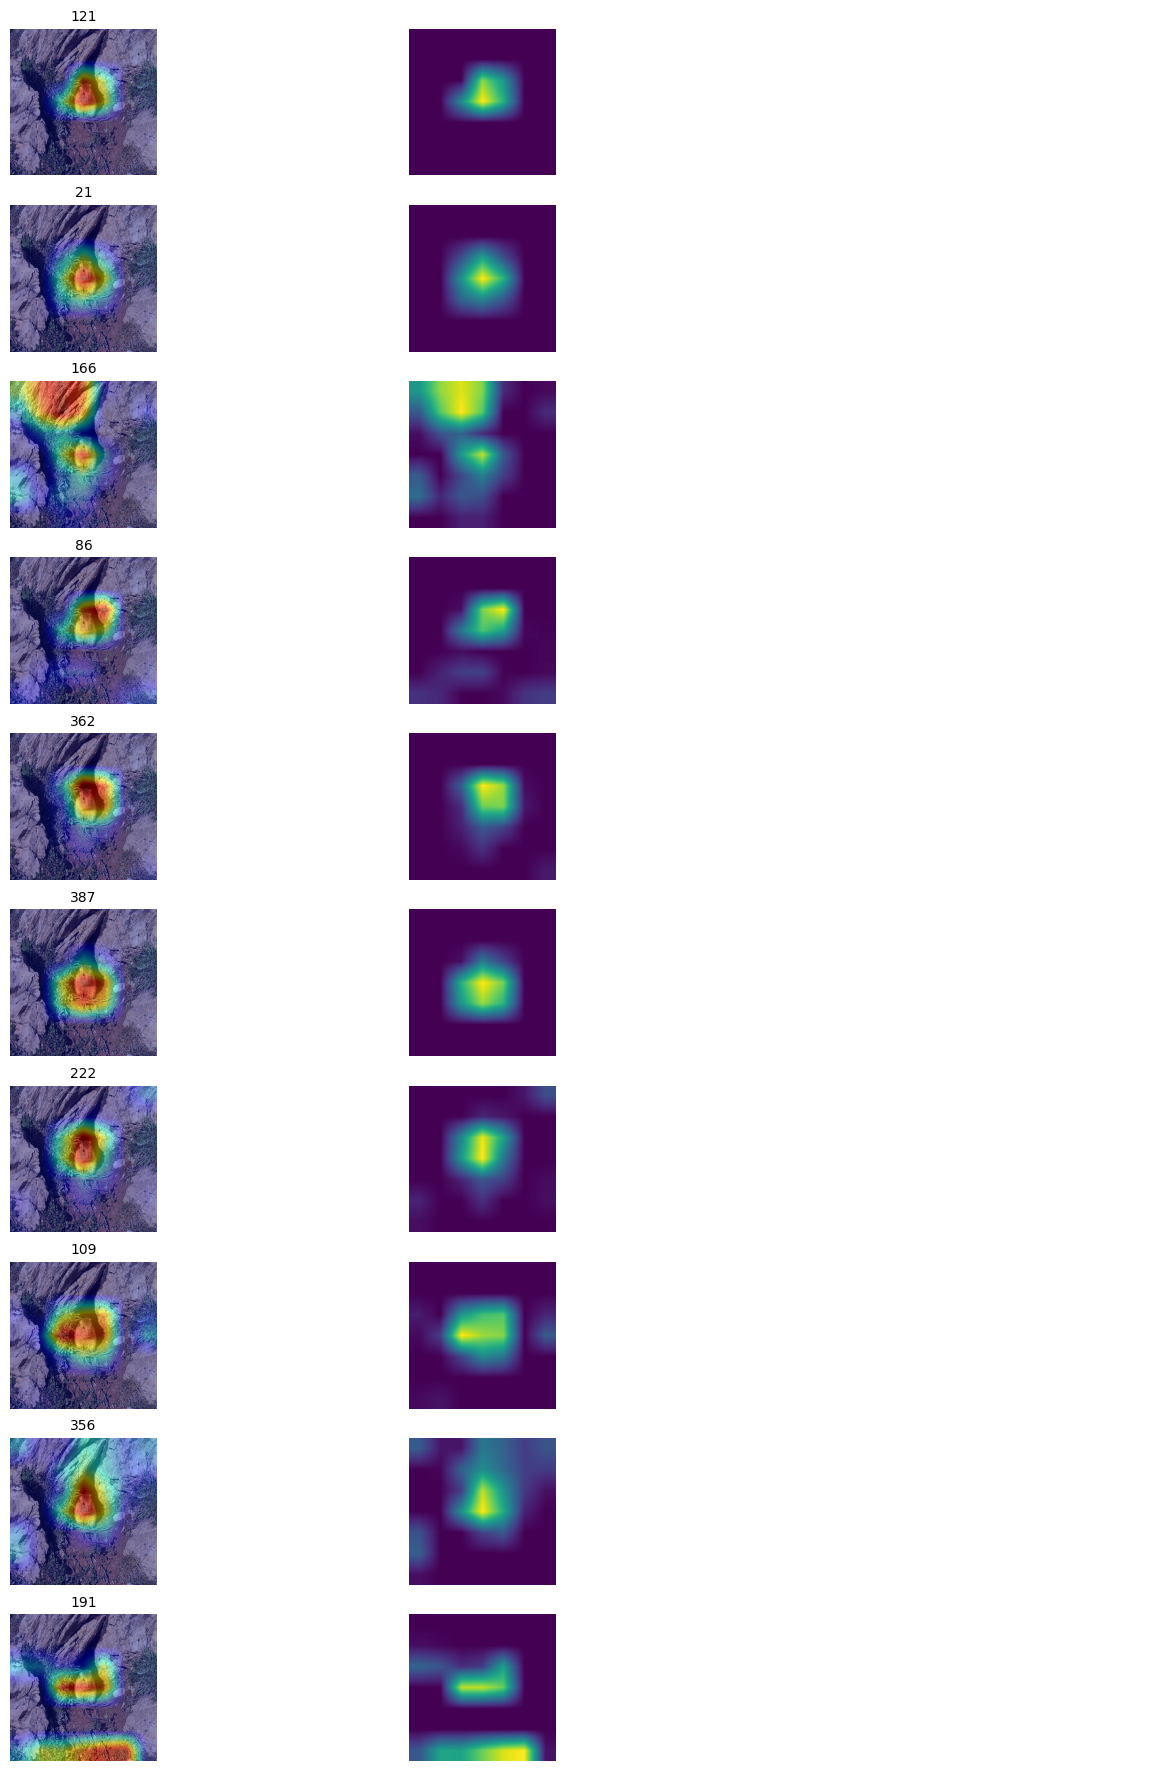

In [17]:
# l = list(range(0, 100 + 1))
u = len(l)
fig, axs = plt.subplots(u, 6, figsize=(15, 5*(u-1)/2))
for i, k in enumerate(l):
    
    activations_visualization = show_cam_on_image(img, activations_scale[k], use_rgb=True)
    # grads_visualization = show_cam_on_image(img, grads_scale[k], use_rgb=True)
    # total_visualization = show_cam_on_image(img, activations_scale[k]*grads_scale[k], use_rgb=True)

    axs[i, 0].imshow(activations_visualization)
    axs[i, 0].set_title(f"{k}", fontsize=10)
    axs[i, 0].axis('off')  # Hide axes
    # axs[i, 1].imshow(grads_visualization)
    # axs[k, 1].set_title(f"grads_visualization", fontsize=10)
    axs[i, 1].axis('off')  # Hide axes
    axs[i, 2].imshow(activations_scale[k])
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 2].axis('off')  # Hide axes
    # axs[i, 3].imshow(grads_scale[k])
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 3].axis('off')  # Hide axes
    # axs[i, 4].imshow(activations_scale[k]*grads_scale[k])
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 4].axis('off')  # Hide axes
    # axs[i, 5].imshow(total_visualization)
    # axs[k, 0].set_title(f"activations_visualization", fontsize=10)
    axs[i, 5].axis('off')  # Hide axes
plt.show()

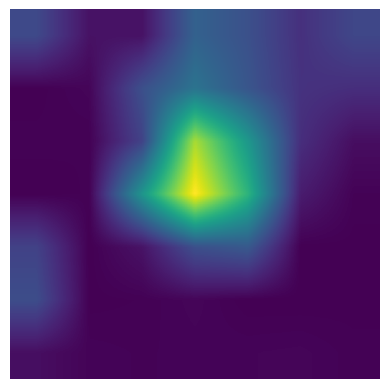

In [18]:
plt.imshow(grayscale_cam)
plt.axis('off')  # Hide axes
plt.show()

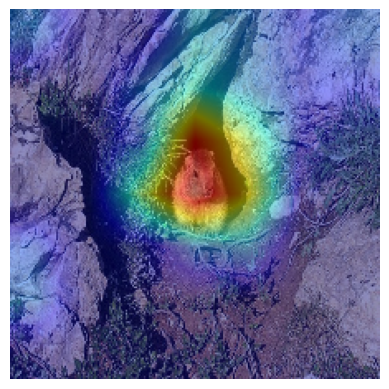

In [19]:
visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(visualization)
plt.axis('off')  # Hide axes
plt.show()

In [20]:
# fig, axs = plt.subplots(32, 16, figsize=(10, 5))

# model_CAM = [GradCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM, EigenCAM, LayerCAM, AblationCAM, HiResCAM, FullGrad, RandomCAM]
# # Load and display each image
# for i in range(32):
#     for j in range(16):
#         # Load the image (replace this with your image loading code)
#         # print(model_CAM[5*i+j])
#         index = 16*i+j
#         image = show_cam_on_image(img, scale[index], use_rgb=True)
#         # Display the image
#         axs[i, j].imshow(image)
#         axs[i, j].set_title(f"{index}", fontsize=10)
#         axs[i, j].axis('off')  # Hide axes
# path = f'images_test/test.png'  # Change this to your desired file path
# plt.savefig(path)